In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
def display(img,cmap='gray'):
    fig=plt.figure(figsize=(12,10))
    ax=fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [25]:
reeses=cv2.imread('reeses_puffs.png',0)

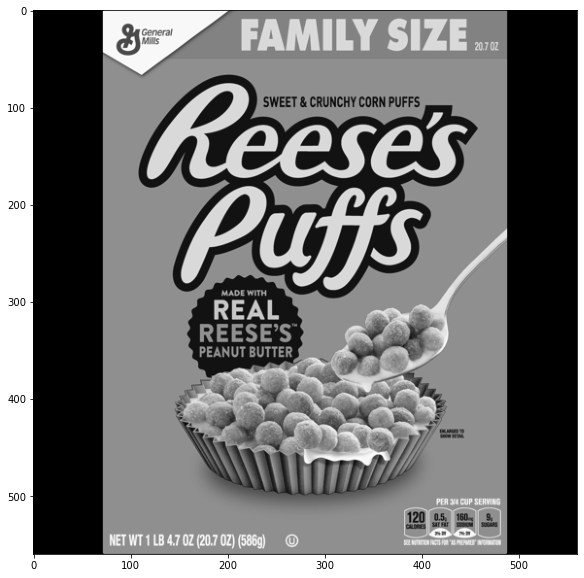

In [26]:
display(reeses)

In [27]:
cereals=cv2.imread("many_cereals.jpg",0)

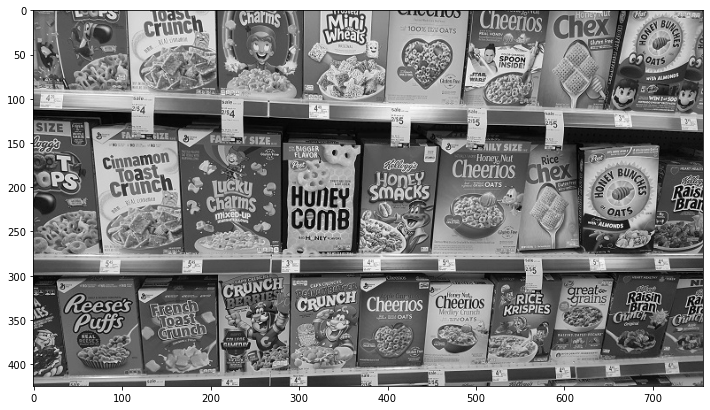

In [28]:
display(cereals)

### Brute force detection with ORB descriptors

In [29]:
#initiate ORB detector
orb=cv2.ORB_create()
#This line initializes the ORB (Oriented FAST and rotated BRIEF) detector,
#which is a feature detector and descriptor extractor.

#find the keypoints and descriptor with ORB
kp1,des1=orb.detectAndCompute(reeses,None)
kp2,des2=orb.detectAndCompute(cereals,None)

#orb.detectAndCompute: find the keypoints (distinctive image features)
#and computes their descriptors (a vector representing the keypoint in a high)
#kp1 and kp2 are lists of keypoints found in the reeses and cereals images,
#respectively
#des1 and des2 are the corresponding descriptors for these keypoints.

#create BFMatcher Object
bf=cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)

#cv2.BFMatcher is the brute-force matcher object,
#which is used to match the descriptor between two images,
#cv2.NORM_HAMMING specifies that the hamming distance
#should be used to compare the descriptor (appropriate for ORB)
#crosscheck-True ensures that the matches are symmetric,
#meaning that if a descriptor in reeses matches a descriptor in cereals,
#the reverse should alos be true

#match descriptors.
matches=bf.match(des1,des2)
#this line matches the descriptor from the two images.
#each matech object contains information about matching keypoints
#from both images
#sort them in the order of their distance
matches=sorted(matches,key=lambda x:x.distance)
#the matches are sorted based on the distance between the descriptor
#shorter distance indicate better matches.

#daw first 25 matches
reeses_matches=cv2.drawMatches(reeses,kp1,cereals,kp2,matches[:25],None,flags=2)
#cv2.drawMatches visualizes the first 25 matches by drawing lines between the  matching 
#flag=2 is used to draw the matches without keypoints.

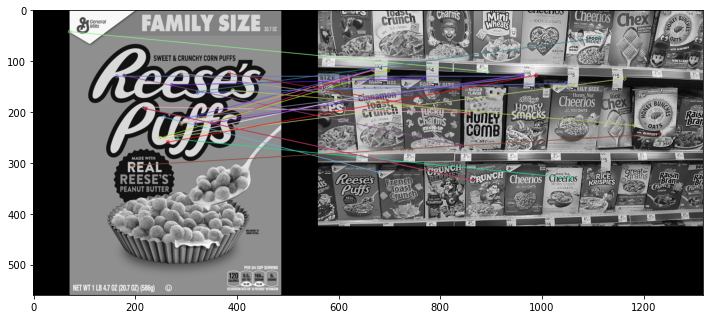

In [30]:
display(reeses_matches)

### brute force matching with SIFT descriptors and ratio test
to detect and match features between two images (reeses and cereals)

In [ ]:
display(sift_matches)

In [39]:
import cv2

# Create a SIFT detector object
sift = cv2.SIFT_create()

# Find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)
#sift.detectAndCompute() detects keypoints and computes their
#corresponding descriptor for the two images.
#kp1 and kp2 are the keypoints detected in reeses and cereals 
#des1 and des2 are the descriptors associated with these keypoints.

# BFMatcher with default params
bf = cv2.BFMatcher()
#this line creates a brute-force matcher objetc with default parameters.
#the BFMatcher matches descriptors between the two images by finding the closest 
# Find the two best matches for each descriptor in des1
matches = bf.knnMatch(des1, des2, k=2)
#bf.knnMatch() finds the two best matches for each descriptor in des1
#(from reeses) by comparing them with all descriptors in des2(from cereals)
#the k=2 parameter means that for each descriptor in des1.
#the two nearest neighbors (best matches) in des2 are found.
# Apply ratio test
good = []
for match1, match2 in matches:
    if match1.distance < 0.75 * match2.distance:
        good.append([match1])
        #the ratio test is used to filter out poor matches.
#it compares the distance of the closest match (match1) to the 
# distance of the second closest match(match2)
#if the distance of match1 is less than 075 times the distance of match2,
#the match is considered "good" and added to the good list.
#the ratio test helps eliminate false matches by ensring that the
#closeset match is significantly better than the second closest.

# Draw matches
sift_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, good, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)


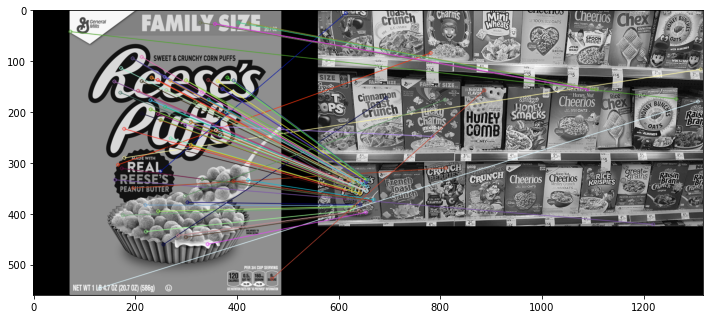

In [40]:
display(sift_matches)

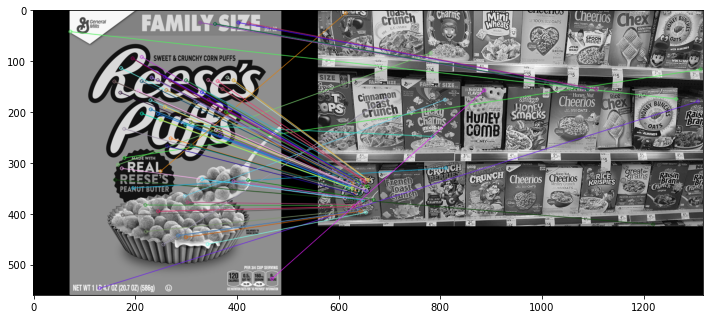

In [41]:
import cv2
#Create SIFT Object
sift = cv2.SIFT_create()

#sift = cv2.xfeatures2d.SIFT_create()
#This line initializes the SIFT detectors, which is used for detecting keypoints and computing
#descriptors. SIFT is known for it's robustness

kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals,None)
#sift.detectAndCompute() detects keypoints and compute their corrospondingg decriptors for the two images.
#kp1 and kp2 are keypoints detected in reeses and cereals , respectively
#des1 and des2 are the descriptors associated with these keypoints.

#BFMatcher with default param
bf = cv2.BFMatcher()

#This line creates a brute-force matcher object with default parameter.
#The BEMatcher matches descriptors between the two images by finding the closest 
matches = bf.knnMatch(des1,des2,k=2)
#bf.knnMatch() finds the two best matches for each descriptor in des1 (from reeses) by comparing them 
#with all 

#Apply ratio test
good = []
for match1,match2 in matches:
    if match1.distance<0.75*match2.distance:
        good.append([match1])
#cv2.drawMatchesKnn expects list of lists as matches.
sift_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=2)
#cv2.drawMatchesKnn draw the matches between the keypoints of the two images.
display(sift_matches)

In [42]:
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1,des2,k=2)
good = []

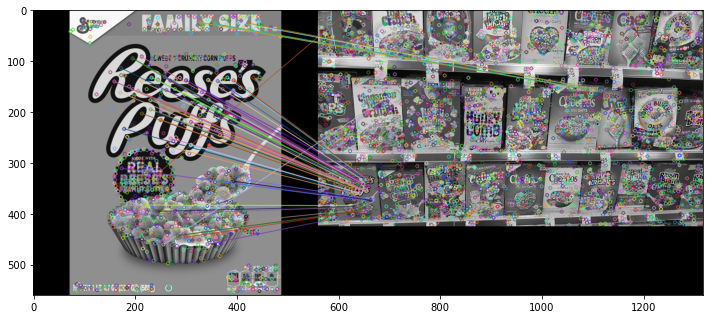

In [43]:
good = []
 # ratio test
for i, (match1, match2) in enumerate (matches): 
    if match1.distance < 0.7*match2.distance:
        good.append([match1])

flann_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, good, None, flags=0)
display(flann_matches)